
# Feature Selection
![types](feature-selection-techniques-in-machine-learning2.png)

## Filter methods
![types](feature-selection-techniques-in-machine-learning4.png)

#### Information Gain 

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.feature_selection import mutual_info_classif

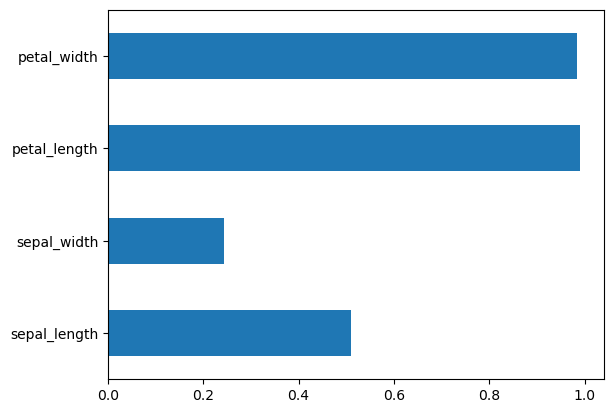

In [7]:
X=df.drop('species',axis=1)
y=df.species
importance=mutual_info_classif(X,y)
fi=pd.Series(importance,index=df.columns[0:-1])
fi.plot(kind='barh')
plt.show()


### Chi-square 

In [9]:
from sklearn.feature_selection import chi2,SelectKBest,f_classif

In [10]:
chi_f=SelectKBest(chi2,k=3)

In [11]:
pd.DataFrame(chi_f.fit_transform(X,y))

,0,1,2
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


### Correlation method

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder().fit(df.species)

In [14]:
df['species']=le.transform(df.species)

<Axes: >

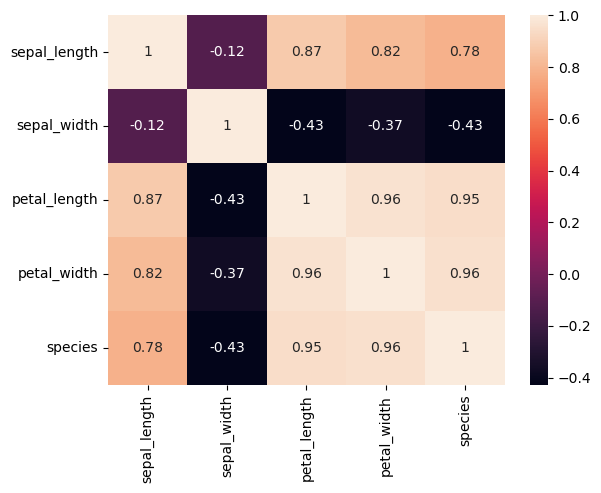

In [15]:
sns.heatmap(df.corr(),annot=True)

### Anova test

In [17]:
from sklearn.feature_selection import SelectKBest,f_classif
anova_f=SelectKBest(f_classif,k=3)

In [18]:
pd.DataFrame(anova_f.fit_transform(X,y))

,0,1,2
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


## Wrapper methods
![types](feature-selection-techniques-in-machine-learning3.png)

#### Forward Feature Selection

In [21]:
pip install mlxtend

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
ss=SequentialFeatureSelector(lr,k_features=3,n_jobs=-1,forward=True)

In [24]:
ss.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(3, 3),
                          n_jobs=-1, scoring='accuracy')

In [25]:
ss.k_feature_names_

('sepal_length', 'petal_length', 'petal_width')

#### Backword Feature Elilmination

In [27]:
be=SequentialFeatureSelector(lr,k_features=3)

In [28]:
be.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(3, 3),
                          scoring='accuracy')

In [29]:
be.k_feature_names_

('sepal_length', 'petal_length', 'petal_width')

## Embeded methods
![types](feature-selection-techniques-in-machine-learning6.png)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model=RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [33]:
model.feature_importances_

array([0.11058791, 0.02555528, 0.43061786, 0.43323894])

## How to choose a Feature Selection Method
![types](feature-selection-techniques-in-machine-learning7.png)